## Preliminaries / Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

import os
from zipfile import ZipFile

from datetime import datetime, timedelta, date

path = '../covid-19.zip'
zip_file = ZipFile(path) 

In [2]:
#Import to dataframe function
def to_dataframe(file):
    df = pd.read_csv(zip_file.open(file))
    pandas_df = pd.concat([pandas_df,df], axis = 0, ignore_index = True, sort = False)
    return pandas_df

In [3]:
#dictionary to keep dataframe names when iterating through zipfile
d = {}  

for text_file in zip_file.infolist():
    if text_file.filename.endswith('.csv'):
        d[text_file.filename] = pd.read_csv(zip_file.open(text_file.filename))

In [4]:
#removing from dictionary and renaming dataframes
covid_deaths_usafacts = d.pop('covid-19/covid_deaths_usafacts.csv')
covid_county_population_usafacts = d.pop('covid-19/covid_county_population_usafacts.csv')
covid_confirmed_usafacts = d.pop('covid-19/covid_confirmed_usafacts.csv')

## Question 1: What are the total confirmed cases per day in the country? 

Computed the sums then created table and line plot below.

In [5]:
#Calculating total for each day

sums = covid_confirmed_usafacts.select_dtypes(np.number).sum().rename('Total')
sums = sums.drop(['countyFIPS', 'stateFIPS'])
sums.to_frame()

,Total
1/22/2020,1
1/23/2020,1
1/24/2020,2
1/25/2020,2
1/26/2020,5
...,...
4/2/2020,241643
4/3/2020,276889
4/4/2020,310597
4/5/2020,335338


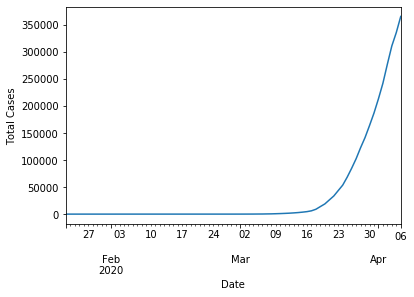

In [310]:
#convert to datetime and plot daily increase in cases
sums.index = pd.to_datetime(sums.index)
sums.plot(x = 'Date', y = 'Total', kind = 'line')
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

## Question 2: Compute the total confirmed cases per week in the country. Produce a table of results. Plot the results using a log line plot. 

### The log graph is a straight line after week 4/5 which indicates that it is an exponential process. The bend at the end near week 11 indicates it may possibly be slowing but it also may still be too soon to tell. 

In [6]:
#Function to return number of weeks between two dates (using date(year, month, day) input)

def weeks_count(start_date, end_date):
    return (start_date - end_date).days//7 * -1


In [7]:
weeks_count(date(2020, 1, 22), date(2020, 4, 5))

11

In [8]:
#set up for dataframe

pieces_for_total = []
weeks = list(range(1,12))
days = list(range(1,8))


a = 0
b = 7
week_sum = 0

#getting total for week
for week in range(1,12):
    current_week = sums.iloc[b]
    pieces_for_total.append(current_week)
    a = a + 7
    b = b + 7
    if b > 70:
        b = 75
        
#creating dataframe and table        
total_cases_per_week = { 'Week': weeks, 'Total Cases': pieces_for_total} 
total_cases_per_week_df = pd.DataFrame(total_cases_per_week)
print(total_cases_per_week_df) 

    Week  Total Cases
0      1            5
1      2           11
2      3           12
3      4           13
4      5           15
5      6          103
6      7         1325
7      8         8997
8      9        68244
9     10       212915
10    11       365115


### Plots
The log graph is a straight line after week 4/5 which indicates that it is an exponential process. The bend at the end near week 11 indicates it may possibly be slowing but it also may still be too soon to tell. 

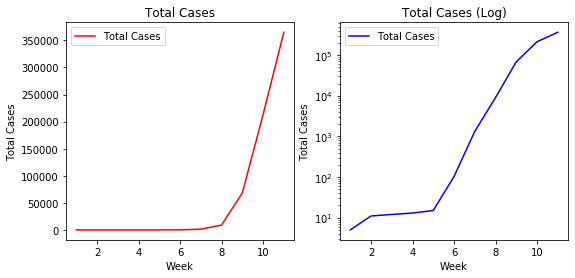

In [314]:
fig, ax = plt.subplots(ncols=2, figsize=(9,4))

total_cases_per_week_df.plot(x = 'Week', y = 'Total Cases', kind = 'line', color = 'red', ax = plt.subplot(1, 2, 1))
plt.xlabel("Week")
plt.ylabel("Total Cases")
plt.title('Total Cases', fontdict=None, loc='center') 

total_cases_per_week_df.plot(x = 'Week', y = 'Total Cases', kind = 'line', color = 'blue', ax = plt.subplot(1, 2, 2))
plt.xlabel("Week")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('Total Cases (Log)', fontdict=None, loc='center') 
plt.show()

## Question 3: Compute the number of new confirmed cases per week in the the country. Produce a table of results

Similar to previous question except subtracting past weeks from sum to get current week's new cases

In [315]:
#COMPUTES NEW CASES PER WEEK

#set up for dataframe
pieces_for_new = []
weeks = list(range(1,12))
days = list(range(1,8))
a = 0
b = 7
week_sum = 0

#getting current weeks new cases
for week in range(1,12):
    if week == 1:
        week1 = sums.iloc[b]
        current_week = week1
        a = a + 7
        b = b + 7
        pieces_for_new.append(current_week)
    else:
        current_week = sums.iloc[b] - sums.iloc[a]
        pieces_for_new.append(current_week)
        a = a + 7
        b = b + 7
        if b > 70:
            b = 75

#creating dataframe and table
new_cases_per_week = { 'Week': weeks, 'Total Cases': pieces_for_new} 
new_cases_per_week_df = pd.DataFrame(new_cases_per_week)
print(new_cases_per_week_df)

#double checking sum
new_cases_per_week_df['Total Cases'].sum()

    Week  Total Cases
0      1            5
1      2            6
2      3            1
3      4            1
4      5            2
5      6           88
6      7         1222
7      8         7672
8      9        59247
9     10       144671
10    11       152200


365115

## Question 4: Repeat #2 with the number of known deaths. Compute the total confirmed deaths per week in the country. Produce a table of results. Plot the results using a log line plot. Does the resulting plot look like an exponential?

In [316]:
death_sums = covid_deaths_usafacts.select_dtypes(np.number).sum().rename('Total Deaths')
death_sums = death_sums.drop(['countyFIPS', 'stateFIPS'])
death_sums.to_frame()

,Total Deaths
1/22/2020,0.0
1/23/2020,0.0
1/24/2020,0.0
1/25/2020,0.0
1/26/2020,0.0
...,...
4/2/2020,5874.0
4/3/2020,7049.0
4/4/2020,8236.0
4/5/2020,9547.0


In [339]:
#set up for dataframe

pieces_for_total_deaths = []
weeks = list(range(1,12))
days = list(range(1,8))


a = 0
b = 7
week_sum = 0

#getting total for week
for week in range(1,12):
    current_week = death_sums.iloc[b]
    pieces_for_total_deaths.append(current_week)
    a = a + 7
    b = b + 7
    if b > 70:
        b = 75
        
#creating dataframe and table        
total_deaths_per_week = { 'Week': weeks, 'Total Deaths': pieces_for_total_deaths} 
total_deaths_per_week_df = pd.DataFrame(total_deaths_per_week)
print(total_deaths_per_week_df) 

    Week  Total Deaths
0      1           0.0
1      2           0.0
2      3           0.0
3      4           0.0
4      5           0.0
5      6          11.0
6      7          37.0
7      8         147.0
8      9        1001.0
9     10        4788.0
10    11       10848.0


### Plots for Total Deaths
The log graph is a straight line starting around week 6 which indicates that it is an exponential process. 

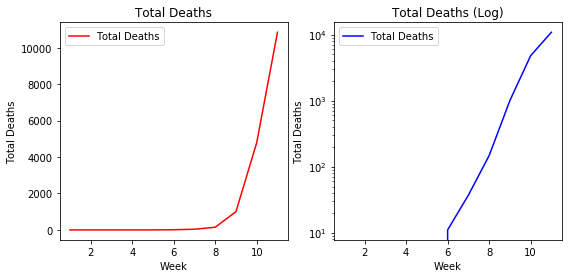

In [318]:
fig, ax = plt.subplots(ncols=2, figsize=(9,4))

total_deaths_per_week_df.plot(x = 'Week', y = 'Total Deaths', kind = 'line', color = 'red', ax = plt.subplot(1, 2, 1))
plt.xlabel("Week")
plt.ylabel("Total Deaths")
plt.title('Total Deaths', fontdict=None, loc='center') 

total_deaths_per_week_df.plot(x = 'Week', y = 'Total Deaths', kind = 'line', color = 'blue', ax = plt.subplot(1, 2, 2))
plt.xlabel("Week")
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.title('Total Deaths (Log)', fontdict=None, loc='center') 
plt.show()

## Question 5: Find the 10 counties with the most known number of covid-19 cases. Plot the number of cases each week. What are the differences or similarities?

### A: From the plots we see that counties such as Cook and Bergen had some of the earliest confirmed cases. In most of the counties at the bottom of the list, it is not certain that they have "peaked" or if the rate of increase is slowing yet. However, for the counties at the top of the list, it appears that the rate of increase is slowing.

### Helper functions for getting cases/deaths per day/week for each county

In [319]:
def get_total_cases_per_day_df(data_file, county):
    row_num = data_file.loc[data_file['County Name']==county].index
    df = covid_confirmed_usafacts.iloc[row_num, 4:-1].sum()
    return df

def get_total_cases_per_week_df(data_file, county):
    cases_per_day = get_total_cases_per_day_df(data_file, county)
    pieces_for_total = []
    weeks = list(range(1,12))
    days = list(range(1,8))
    
    a = 0
    b = 7
    week_sum = 0

    #getting total for week
    for week in range(1,12):
        current_week = cases_per_day[a:b].sum()
        pieces_for_total.append(current_week)
        a = a + 7
        b = b + 7
        if b > 70:
            b = 76
        
    #creating dataframe and table        
    total_cases_per_week = { 'Week': weeks, 'Total Cases': pieces_for_total} 
    total_cases_per_week_df = pd.DataFrame(total_cases_per_week)
    return total_cases_per_week_df

In [320]:
def get_total_cases_per_week(data_file, county):
    cases_per_day = get_total_cases_per_day_df(data_file, county)
    pieces_for_total = []
    weeks = list(range(1,12))
    days = list(range(1,8))
    
    a = 0
    b = 7
    week_sum = 0

    #getting total for week
    for week in range(1,12):
        current_week = cases_per_day[a:b].sum()
        pieces_for_total.append(current_week)
        a = a + 7
        b = b + 7
        if b > 70:
            b = 76
    return sum(pieces_for_total)

In [321]:
def get_total_cases_in_county(data_file, county):
    row_num = data_file.loc[data_file['County Name']==county].index
    df = covid_confirmed_usafacts.iloc[row_num, 4:-1].sum()
    return sum(df)

In [322]:
#finding 10 counties with most known cases
county_current_cases = covid_confirmed_usafacts[['County Name','4/6/2020']]
top_10_most = county_current_cases.sort_values(by='4/6/2020', ascending=False, ignore_index = True)[0:10]
top_10_most

,County Name,4/6/2020
0,Queens County,23133
1,Kings County,19702
2,Nassau County,15616
3,Bronx County,14327
4,Westchester County,14294
5,Suffolk County,13487
6,New York County,10440
7,Cook County,8728
8,Wayne County,8270
9,Bergen County,6862


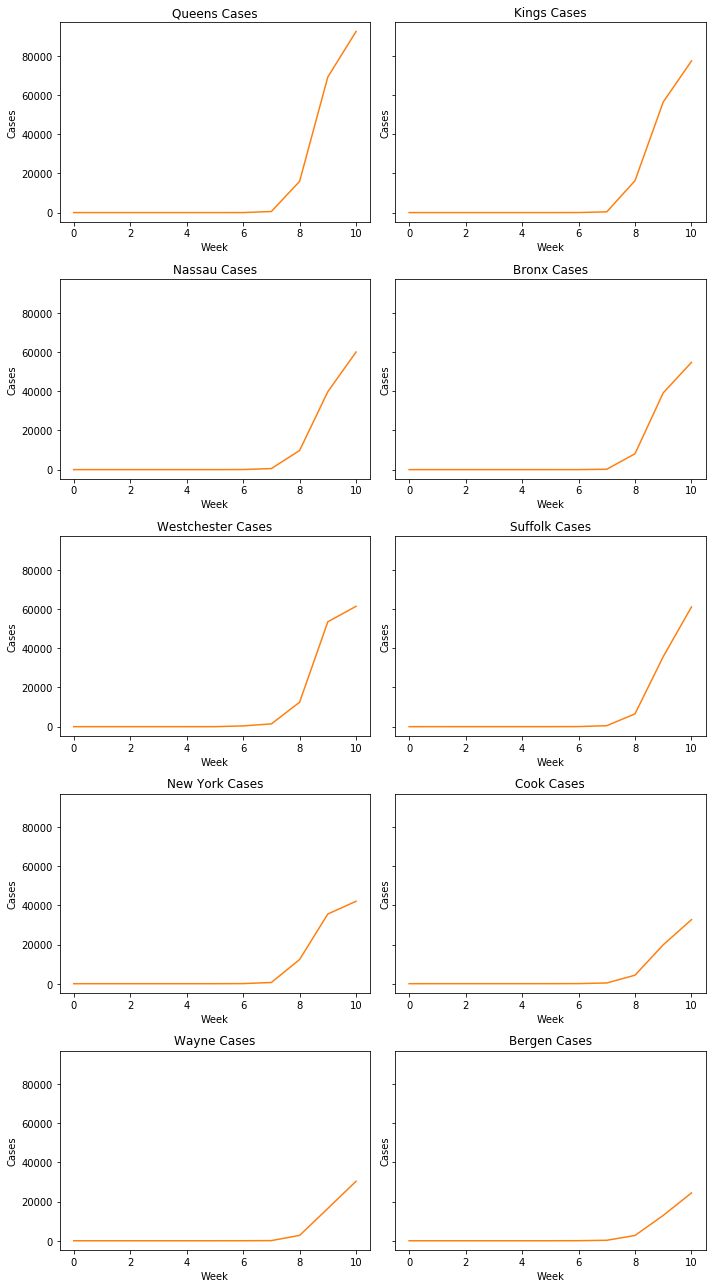

In [323]:
#Regular plots
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (10,18), sharey = True)
axs[0, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Queens County'))
axs[0, 0].set_title('Queens Cases')

axs[0, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Kings County'))
axs[0, 1].set_title('Kings Cases')

axs[1, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Nassau County'))
axs[1, 0].set_title('Nassau Cases')

axs[1, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Bronx County'))
axs[1, 1].set_title('Bronx Cases')

axs[2, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Westchester County'))
axs[2, 0].set_title('Westchester Cases')

axs[2, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Suffolk County'))
axs[2, 1].set_title('Suffolk Cases')

axs[3, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'New York County'))
axs[3, 0].set_title('New York Cases')

axs[3, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Cook County'))
axs[3, 1].set_title('Cook Cases')

axs[4, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Wayne County'))
axs[4, 0].set_title('Wayne Cases')

axs[4, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Bergen County'))
axs[4, 1].set_title('Bergen Cases')

for ax in axs.flat:
    ax.set(xlabel='Week', ylabel='Cases')
    ax.lines[0].remove()
    
fig.tight_layout()
plt.show()

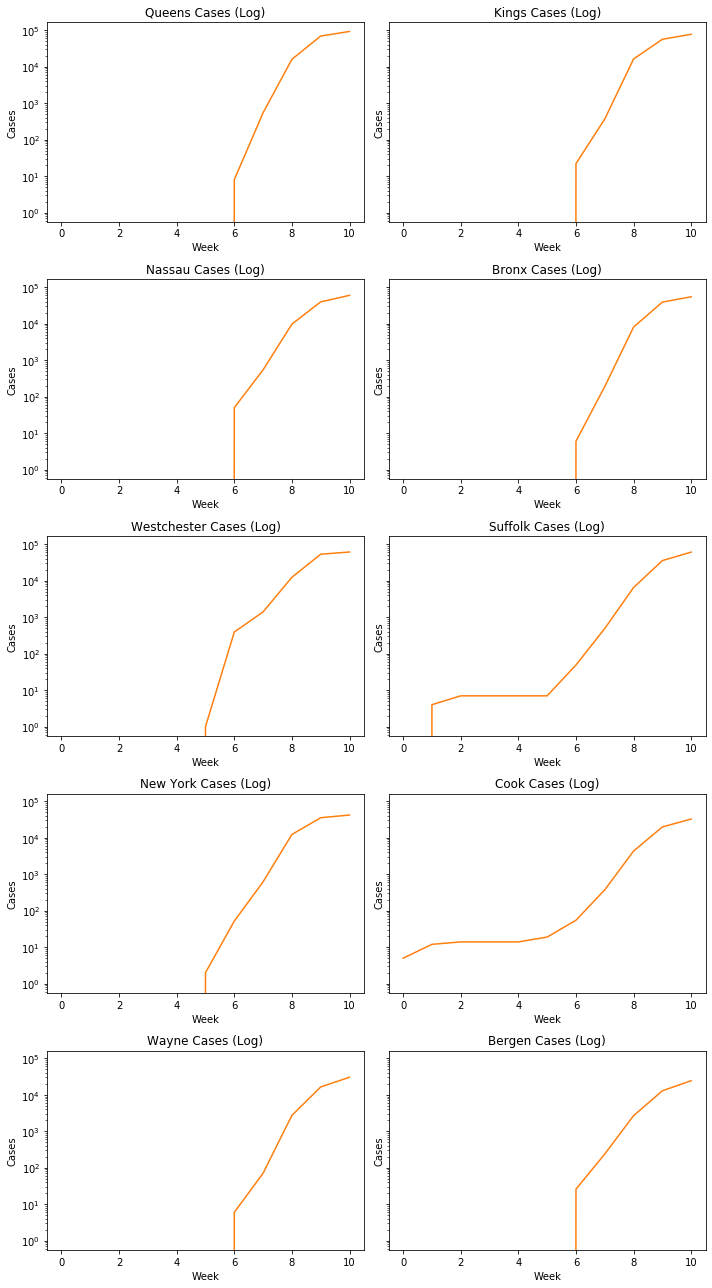

In [324]:
#log plots
fig, axs = plt.subplots(nrows = 5, ncols = 2, figsize = (10,18), sharey = True)
axs[0, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Queens County'))
axs[0, 0].set_title('Queens Cases (Log)')

axs[0, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Kings County'))
axs[0, 1].set_title('Kings Cases (Log)')

axs[1, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Nassau County'))
axs[1, 0].set_title('Nassau Cases (Log)')

axs[1, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Bronx County'))
axs[1, 1].set_title('Bronx Cases (Log)')

axs[2, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Westchester County'))
axs[2, 0].set_title('Westchester Cases (Log)')

axs[2, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Suffolk County'))
axs[2, 1].set_title('Suffolk Cases (Log)')

axs[3, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'New York County'))
axs[3, 0].set_title('New York Cases (Log)')

axs[3, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Cook County'))
axs[3, 1].set_title('Cook Cases (Log)')

axs[4, 0].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Wayne County'))
axs[4, 0].set_title('Wayne Cases (Log)')

axs[4, 1].plot(get_total_cases_per_week_df(covid_confirmed_usafacts, 'Bergen County'))
axs[4, 1].set_title('Bergen Cases (Log)')

for ax in axs.flat:
    ax.set(xlabel='Week', ylabel='Cases')
    ax.set_yscale('log')
    ax.lines[0].remove()
    
fig.tight_layout()
plt.show()

## Question 6: Compute the number of known cases per population in each county that have cases of covid-19. Produce a bar graph and table of the results for the 10 counties with the highest values and the 10 counties with the lowest values.

In [325]:
d = {}

for county in enumerate(has_cases.values):
    pop_count = population.loc[population['countyFIPS'] == county[1][1], 'population']
    cases = county[1][2]
    d[county[1][0]] = cases/pop_count


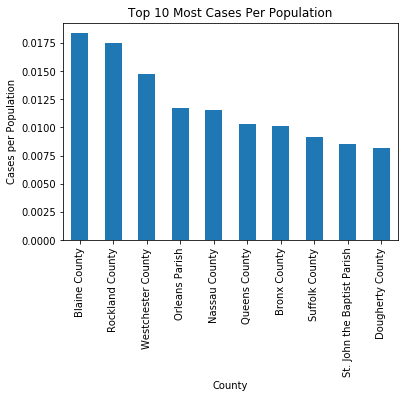

Blaine County                  0.018375
Rockland County                0.017505
Westchester County             0.014774
Orleans Parish                 0.011701
Nassau County                  0.011508
Queens County                  0.010264
Bronx County                   0.010102
Suffolk County                 0.009134
St. John the Baptist Parish    0.008544
Dougherty County               0.008209
dtype: float64


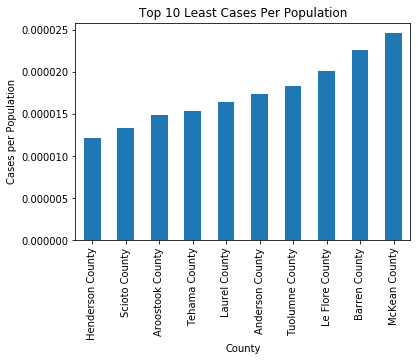

Henderson County    0.000012
Scioto County       0.000013
Aroostook County    0.000015
Tehama County       0.000015
Laurel County       0.000016
Anderson County     0.000017
Tuolumne County     0.000018
Le Flore County     0.000020
Barren County       0.000023
McKean County       0.000025
dtype: float64


In [326]:
cases_per_pop = pd.DataFrame(d).max()
top_10_per_pop = cases_per_pop.sort_values(ascending = False)[2:12]
least_10_per_pop = cases_per_pop.sort_values(ascending = True)[0:10]


top_10_per_pop.plot(kind = 'bar')
plt.xlabel("County")
plt.ylabel("Cases per Population")
plt.title('Top 10 Most Cases Per Population', fontdict=None, loc='center') 
plt.show()
print(top_10_per_pop)

least_10_per_pop.plot(kind = 'bar')
plt.xlabel("County")
plt.ylabel("Cases per Population")
plt.title('Top 10 Least Cases Per Population', fontdict=None, loc='center')
fig.tight_layout()
plt.show()
print(least_10_per_pop)

## Question 7: Compute the death rate (deaths/ known cases) in each county that have both deaths and known cases. Compute the mean and standard deviation of the results. 

### A: After checking counties that do have deaths and cases, the mean death rate was 0.0841 with standard deviation of 0.1479

In [327]:
county_current_cases = covid_confirmed_usafacts[['County Name','countyFIPS','4/6/2020']]
county_current_deaths = covid_deaths_usafacts[['County Name','countyFIPS','4/6/2020']]

has_cases = county_current_cases[county_current_cases['4/6/2020'] != 0 ]

population = covid_county_population_usafacts[['County Name','countyFIPS', 'population']]

In [328]:
#getting dictionary to put death rates based on countyFIPS
d2 = {}

for county in enumerate(county_current_deaths.values):
    deaths = county[1][2]
    cases = county_current_cases.loc[county_current_cases['countyFIPS'] == county[1][1], '4/6/2020']
    rate = deaths/cases
    d2[county[1][0]] = rate

In [329]:
#removing zeros and nans so those without deaths are not included in mean/sd calculation
death_rates = pd.DataFrame(d2).max()

has_deaths = death_rates[death_rates!=0]
has_deaths.dropna()

print('Mean: ',has_deaths.mean())
print('Standard Deviation: ', has_deaths.std())

Mean:  0.08406774941354297
Standard Deviation:  0.14787365179921733


## Question 8: Produce a violin plot of the death rates found in #7

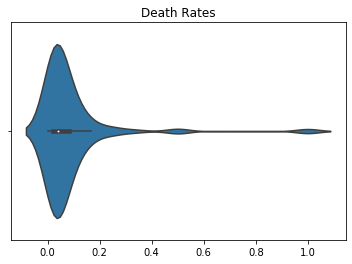

In [330]:
import seaborn as sns

df = pd.DataFrame(has_deaths)
sns.violinplot(x = df)
plt.title('Death Rates', fontdict=None, loc='center') 
plt.show()

## Question 9: There is some hope that covid-19 may have peaked in NYC (counties Bronx, Kings, New York, Queens and Richmond). Is there any evidence of that in the data?

### A: From the log graphs we can see that the rate of increasing cases is slowing which shows that there is a possiblity that NYC may have peaked if this rate continues

In [331]:
NY_total_cases = covid_confirmed_usafacts[covid_confirmed_usafacts.State.isin(['NY'])]

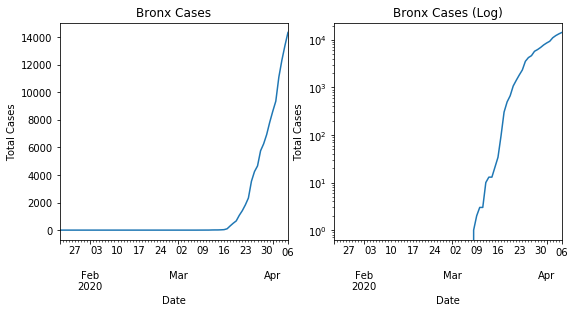

In [332]:
#getting total cases over time
Bronx = NY_total_cases[NY_total_cases['County Name'] == 'Bronx County']
Bronx_sum = Bronx.select_dtypes(np.number).sum().rename('Total Cases')
Bronx_sum = Bronx_sum.drop(['countyFIPS', 'stateFIPS'])
Bronx_sum.to_frame()
Bronx_sum.index = pd.to_datetime(Bronx_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))

Bronx_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('Bronx Cases', fontdict=None, loc='center') 

Bronx_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('Bronx Cases (Log)', fontdict=None, loc='center') 
plt.show()

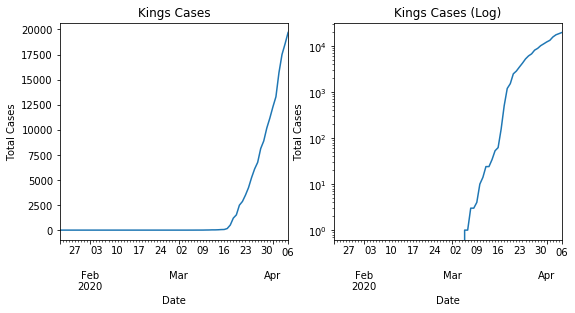

In [333]:
#getting total cases over time
Kings = NY_total_cases[NY_total_cases['County Name'] == 'Kings County']
Kings_sum = Kings.select_dtypes(np.number).sum().rename('Total Cases')
Kings_sum = Kings_sum.drop(['countyFIPS', 'stateFIPS'])
Kings_sum.to_frame()
Kings_sum.index = pd.to_datetime(Kings_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))
Kings_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('Kings Cases', fontdict=None, loc='center')

Kings_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('Kings Cases (Log)', fontdict=None, loc='center') 
plt.show()

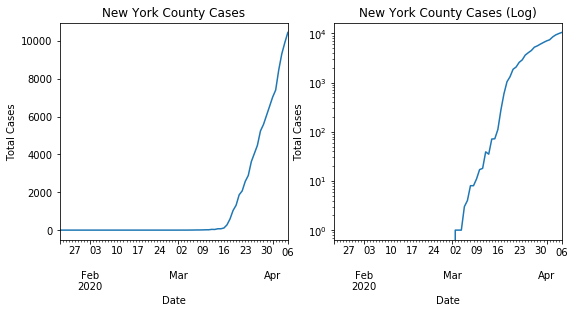

In [334]:
#getting total cases over time
New_York = NY_total_cases[NY_total_cases['County Name'] == 'New York County']

New_York_sum = NY_total_cases[NY_total_cases['County Name'] == 'New York County']
New_York_sum = New_York.select_dtypes(np.number).sum().rename('Total Cases')
New_York_sum = New_York_sum.drop(['countyFIPS', 'stateFIPS'])
New_York_sum.to_frame()
New_York_sum.index = pd.to_datetime(New_York_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))

New_York_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('New York County Cases', fontdict=None, loc='center') 

#plotting
New_York_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('New York County Cases (Log)', fontdict=None, loc='center') 
plt.show()

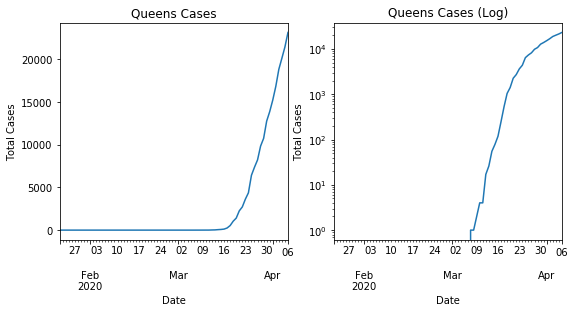

In [335]:
Queens = NY_total_cases[NY_total_cases['County Name'] == 'Queens County']

#getting total cases over time
Queens = NY_total_cases[NY_total_cases['County Name'] == 'Queens County']
Queens_sum = Queens.select_dtypes(np.number).sum().rename('Total Cases')
Queens_sum = Queens_sum.drop(['countyFIPS', 'stateFIPS'])
Queens_sum.to_frame()
Queens_sum.index = pd.to_datetime(Queens_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))
Queens_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('Queens Cases', fontdict=None, loc='center')

Queens_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('Queens Cases (Log)', fontdict=None, loc='center') 
plt.show()

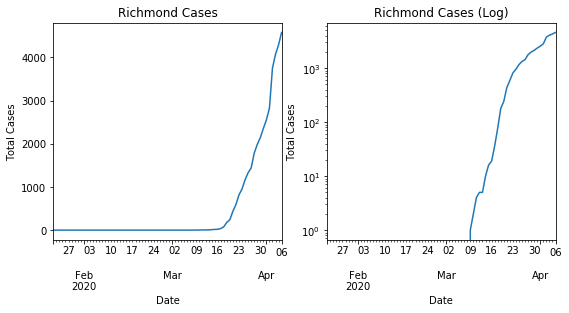

In [336]:
Richmond = NY_total_cases[NY_total_cases['County Name'] == 'Richmond County']

#getting total cases over time
Richmond = NY_total_cases[NY_total_cases['County Name'] == 'Richmond County']
Richmond_sum = Richmond.select_dtypes(np.number).sum().rename('Total Cases')
Richmond_sum = Richmond_sum.drop(['countyFIPS', 'stateFIPS'])
Richmond_sum.to_frame()
Richmond_sum.index = pd.to_datetime(Richmond_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))
Richmond_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('Richmond Cases', fontdict=None, loc='center')

Richmond_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('Richmond Cases (Log)', fontdict=None, loc='center') 
plt.show()

## Question 10: Seattle (King county in Washington) also hopes that they have peaked. Is there any evidence of that in the data?

### A: From the log graph, it also appears that the rate of increasing cases has also slowed. King county may have peaked if the current trend continues.

In [337]:
Seattle_total_cases = covid_confirmed_usafacts[covid_confirmed_usafacts.State.isin(['WA'])]

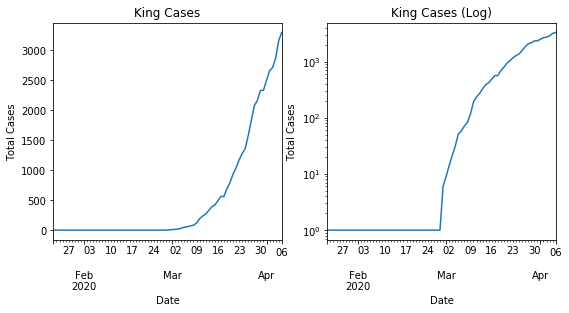

In [338]:
King = Seattle_total_cases[Seattle_total_cases['County Name'] == 'King County']

#getting total cases over time
King = Seattle_total_cases[Seattle_total_cases['County Name'] == 'King County']
King_sum = King.select_dtypes(np.number).sum().rename('Total Cases')
King_sum = King_sum.drop(['countyFIPS', 'stateFIPS'])
King_sum.to_frame()
King_sum.index = pd.to_datetime(King_sum.index)

#plotting
fig, ax = plt.subplots(ncols=2, figsize=(9,4))
King_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 1))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.title('King Cases', fontdict=None, loc='center')

King_sum.plot(x = 'Date', y = 'Total Cases', kind = 'line', ax = plt.subplot(1, 2, 2))
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.yscale('log')
plt.title('King Cases (Log)', fontdict=None, loc='center') 
plt.show()